In [34]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

from sklearn.metrics import SCORERS
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,classification_report,accuracy_score,confusion_matrix

In [35]:
df = pd.read_csv('Converted_data_set')
X = df.drop('target',axis=1)
y = df['target']

# Train Test validate Split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [37]:
X_test,X_validate,y_test,y_validate = train_test_split(X_test, y_test, test_size=0.50, random_state=42)

# Scaling

In [38]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_validate_scaled = scaler.transform(X_validate)

# Model Training

In [7]:
def trainModel(model,X_train,X_test,y_train,y_test):
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test,y_pred))
    print(plot_confusion_matrix(model,X_test,y_test))
    print(plot_roc_curve(model,X_test,y_test))

In [8]:
def trainModelGrid(model,X_train,X_test,y_train,y_test):
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(model.best_params_)
    print(classification_report(y_test,y_pred))
    print(plot_confusion_matrix(model,X_test,y_test))

### Logistic Regression

              precision    recall  f1-score   support

           0       0.90      0.85      0.87        72
           1       0.87      0.91      0.89        82

    accuracy                           0.88       154
   macro avg       0.88      0.88      0.88       154
weighted avg       0.88      0.88      0.88       154



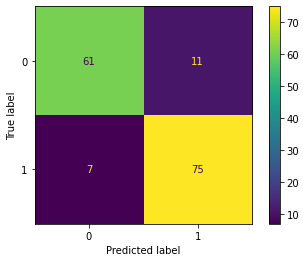

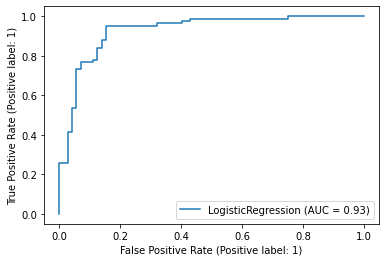

In [9]:
model = LogisticRegression()
trainModel(model,X_train_scaled,X_test_scaled,y_train,y_test)

In [10]:
# Because In this I can accept more +ve than false -negative
model = LogisticRegression()
model.fit(X_train_scaled,y_train)
prob = model.predict_proba(X_test_scaled)[:,1]
y_pred = np.where(prob >=0.4,1,0) # Choosing custom thresold
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        72
           1       0.88      0.95      0.91        82

    accuracy                           0.90       154
   macro avg       0.91      0.90      0.90       154
weighted avg       0.91      0.90      0.90       154

[[61 11]
 [ 4 78]]


### SVC

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        72
           1       0.91      0.95      0.93        82

    accuracy                           0.92       154
   macro avg       0.92      0.92      0.92       154
weighted avg       0.92      0.92      0.92       154



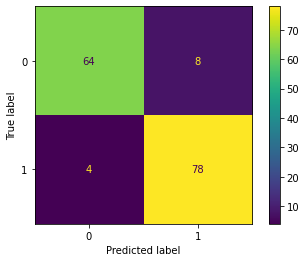

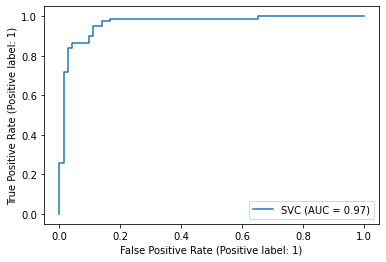

In [11]:
model = SVC()
trainModel(model,X_train_scaled,X_test_scaled,y_train,y_test)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ...........C=1.0, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=1.0, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=1.0, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=1.0, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=1.0, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ........C=1.0, degree=3, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=1.0, degree=3, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=1.0, degree=3, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=1.0, degree=3, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=1.0, degree=3, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ............C=1.0, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ............C=1.0, degree=3, gamma=aut

[CV] END .............C=5, degree=4, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .............C=5, degree=4, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .............C=5, degree=4, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..........C=5, degree=4, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..........C=5, degree=4, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..........C=5, degree=4, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..........C=5, degree=4, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..........C=5, degree=4, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..............C=5, degree=4, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..............C=5, degree=4, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..............C=5, degree=4, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..............C=5, degree=4, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..............C=5, 

[CV] END ........C=100, degree=3, gamma=scale, kernel=linear; total time=   0.4s
[CV] END ........C=100, degree=3, gamma=scale, kernel=linear; total time=   0.6s
[CV] END ........C=100, degree=3, gamma=scale, kernel=linear; total time=   0.8s
[CV] END ........C=100, degree=3, gamma=scale, kernel=linear; total time=   0.5s
[CV] END ........C=100, degree=3, gamma=scale, kernel=linear; total time=   0.6s
[CV] END ............C=100, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ............C=100, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ............C=100, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ............C=100, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ............C=100, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .........C=100, degree=3, gamma=auto, kernel=linear; total time=   0.3s
[CV] END .........C=100, degree=3, gamma=auto, kernel=linear; total time=   0.5s
[CV] END .........C=100, deg

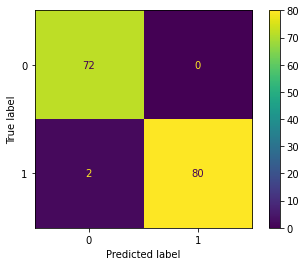

In [12]:
model = SVC()

param = {'C':[1.0,2,5,10,50,100],
    'kernel': ['rbf','linear'],
    'degree':[3,4],
    'gamma':['scale','auto']}

gridModel = GridSearchCV(model,param_grid=param,scoring='accuracy',cv=5,verbose=2)
trainModelGrid(gridModel,X_train_scaled,X_test_scaled,y_train,y_test)

In [13]:
model = SVC(C=50,probability=True)
model.fit(X_train_scaled,y_train)
prob = model.predict_proba(X_test_scaled)[:,1]
y_pred = np.where(prob >=0.4,1,0) # Choosing custom thresold
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.98      0.99        82

    accuracy                           0.99       154
   macro avg       0.99      0.99      0.99       154
weighted avg       0.99      0.99      0.99       154

[[72  0]
 [ 2 80]]


In [14]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

### KNN

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.98      0.99        82

    accuracy                           0.99       154
   macro avg       0.99      0.99      0.99       154
weighted avg       0.99      0.99      0.99       154



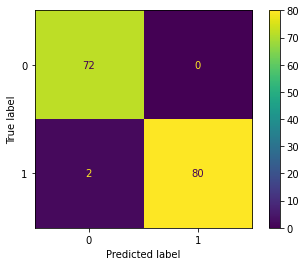

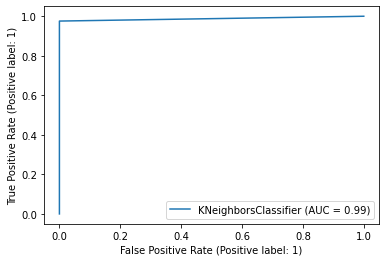

In [15]:
model = KNeighborsClassifier(1)
trainModel(model,X_train_scaled,X_test_scaled,y_train,y_test)

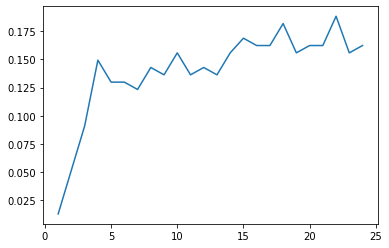

In [16]:
errors = []
for i in range(1,25):
    model = KNeighborsClassifier(i)
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    error = 1 - accuracy_score(y_test,y_pred)
    errors.append(error)
    
plt.plot(range(1,25),errors)

In [17]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train_scaled,y_train)
prob = model.predict_proba(X_test_scaled)[:,1]
y_pred = np.where(prob >=0.2,1,0) # Choosing custom thresold
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.98      0.99        82

    accuracy                           0.99       154
   macro avg       0.99      0.99      0.99       154
weighted avg       0.99      0.99      0.99       154

[[72  0]
 [ 2 80]]


### Decision Tree

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        72
           1       1.00      0.91      0.96        82

    accuracy                           0.95       154
   macro avg       0.96      0.96      0.95       154
weighted avg       0.96      0.95      0.95       154



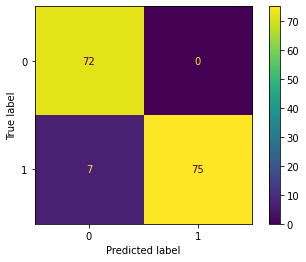

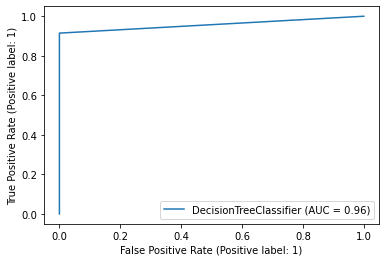

In [39]:
model = DecisionTreeClassifier()
trainModel(model,X_train_scaled,X_test_scaled,y_train,y_test)

### Random Forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        82

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



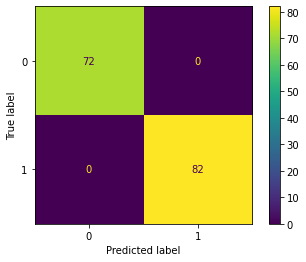

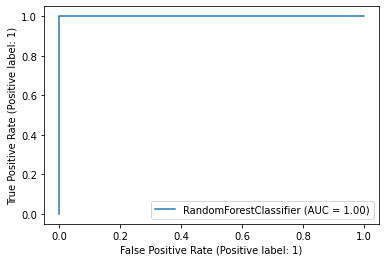

In [40]:
model = RandomForestClassifier()
trainModel(model,X_train_scaled,X_test_scaled,y_train,y_test)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf

[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=160; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=160; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=160; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=160; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=160; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.2s


[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=130; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=140; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=140; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=140; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=140; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=140; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=150; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=150; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=150; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=150; total time=   0.3s


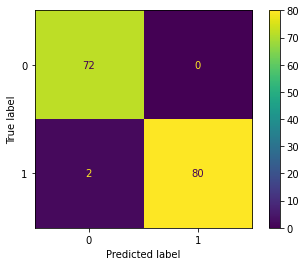

In [20]:
model = RandomForestClassifier()

param = {'n_estimators':[100,120,130,140,150,160],
    'max_depth':[3,4,5,None],
    'min_samples_split':[2,3],
    'min_samples_leaf':[1]}

gridModel = GridSearchCV(model,param_grid=param,scoring='accuracy',cv=5,verbose=2)
trainModelGrid(gridModel,X_train_scaled,X_test_scaled,y_train,y_test)

In [21]:
model = RandomForestClassifier(n_estimators=120)
model.fit(X_train_scaled,y_train)
prob = model.predict_proba(X_test_scaled)[:,1]
y_pred = np.where(prob >=0.4,1,0) # Choosing custom thresold
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        72
           1       0.99      1.00      0.99        82

    accuracy                           0.99       154
   macro avg       0.99      0.99      0.99       154
weighted avg       0.99      0.99      0.99       154

[[71  1]
 [ 0 82]]


### Adaboost

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        72
           1       0.93      0.87      0.90        82

    accuracy                           0.90       154
   macro avg       0.90      0.90      0.90       154
weighted avg       0.90      0.90      0.90       154



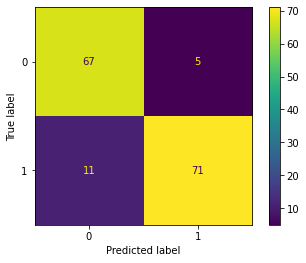

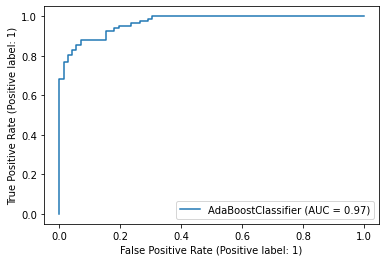

In [22]:
model = AdaBoostClassifier()
trainModel(model,X_train_scaled,X_test_scaled,y_train,y_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ................learning_rate=1.0, n_estimators=100; total time=   0.4s
[CV] END ................learning_rate=1.0, n_estimators=100; total time=   0.3s
[CV] END ................learning_rate=1.0, n_estimators=100; total time=   0.4s
[CV] END ................learning_rate=1.0, n_estimators=100; total time=   0.2s
[CV] END ................learning_rate=1.0, n_estimators=100; total time=   0.4s
[CV] END ................learning_rate=1.0, n_estimators=120; total time=   0.4s
[CV] END ................learning_rate=1.0, n_estimators=120; total time=   0.3s
[CV] END ................learning_rate=1.0, n_estimators=120; total time=   0.3s
[CV] END ................learning_rate=1.0, n_estimators=120; total time=   0.3s
[CV] END ................learning_rate=1.0, n_estimators=120; total time=   0.3s
[CV] END ................learning_rate=1.0, n_estimators=130; total time=   0.3s
[CV] END ................learning_rate=1.0, n_e

[CV] END ................learning_rate=0.6, n_estimators=130; total time=   0.2s
[CV] END ................learning_rate=0.6, n_estimators=130; total time=   0.4s
[CV] END ................learning_rate=0.6, n_estimators=130; total time=   0.3s
[CV] END ................learning_rate=0.6, n_estimators=130; total time=   0.3s
[CV] END ................learning_rate=0.6, n_estimators=140; total time=   0.5s
[CV] END ................learning_rate=0.6, n_estimators=140; total time=   0.2s
[CV] END ................learning_rate=0.6, n_estimators=140; total time=   0.3s
[CV] END ................learning_rate=0.6, n_estimators=140; total time=   0.3s
[CV] END ................learning_rate=0.6, n_estimators=140; total time=   0.3s
[CV] END ................learning_rate=0.6, n_estimators=150; total time=   0.3s
[CV] END ................learning_rate=0.6, n_estimators=150; total time=   0.6s
[CV] END ................learning_rate=0.6, n_estimators=150; total time=   0.3s
[CV] END ................lea

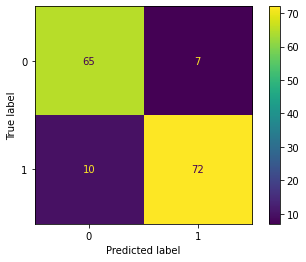

In [23]:
model = AdaBoostClassifier()

param = {'n_estimators':[100,120,130,140,150,160],
       'learning_rate':[1.0,2,0.5,0.6]}

gridModel = GridSearchCV(model,param_grid=param,scoring='accuracy',cv=5,verbose=2)
trainModelGrid(gridModel,X_train_scaled,X_test_scaled,y_train,y_test)

In [24]:
model = AdaBoostClassifier(n_estimators=100)
model.fit(X_train_scaled,y_train)
prob = model.predict_proba(X_test_scaled)[:,1]
y_pred = np.where(prob >=0.5,1,0) # Choosing custom thresold
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        72
           1       0.91      0.88      0.89        82

    accuracy                           0.89       154
   macro avg       0.89      0.89      0.89       154
weighted avg       0.89      0.89      0.89       154

[[65  7]
 [10 72]]


### Gradient Boost

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        72
           1       0.94      0.96      0.95        82

    accuracy                           0.95       154
   macro avg       0.95      0.95      0.95       154
weighted avg       0.95      0.95      0.95       154



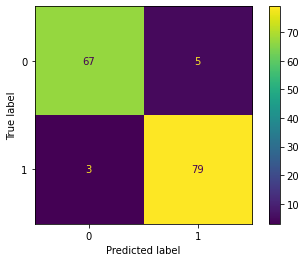

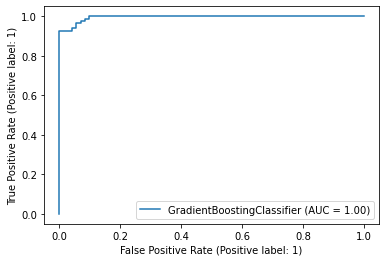

In [25]:
model = GradientBoostingClassifier()
trainModel(model,X_train_scaled,X_test_scaled,y_train,y_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ................learning_rate=1.0, n_estimators=100; total time=   0.1s
[CV] END ................learning_rate=1.0, n_estimators=100; total time=   0.2s
[CV] END ................learning_rate=1.0, n_estimators=100; total time=   0.1s
[CV] END ................learning_rate=1.0, n_estimators=100; total time=   0.1s
[CV] END ................learning_rate=1.0, n_estimators=100; total time=   0.1s
[CV] END ................learning_rate=1.0, n_estimators=120; total time=   0.2s
[CV] END ................learning_rate=1.0, n_estimators=120; total time=   0.2s
[CV] END ................learning_rate=1.0, n_estimators=120; total time=   0.1s
[CV] END ................learning_rate=1.0, n_estimators=120; total time=   0.1s
[CV] END ................learning_rate=1.0, n_estimators=120; total time=   0.2s
[CV] END ................learning_rate=1.0, n_estimators=130; total time=   0.2s
[CV] END ................learning_rate=1.0, n_e

[CV] END ................learning_rate=0.6, n_estimators=130; total time=   0.2s
[CV] END ................learning_rate=0.6, n_estimators=130; total time=   0.2s
[CV] END ................learning_rate=0.6, n_estimators=130; total time=   0.2s
[CV] END ................learning_rate=0.6, n_estimators=130; total time=   0.2s
[CV] END ................learning_rate=0.6, n_estimators=140; total time=   0.2s
[CV] END ................learning_rate=0.6, n_estimators=140; total time=   0.2s
[CV] END ................learning_rate=0.6, n_estimators=140; total time=   0.2s
[CV] END ................learning_rate=0.6, n_estimators=140; total time=   0.2s
[CV] END ................learning_rate=0.6, n_estimators=140; total time=   0.2s
[CV] END ................learning_rate=0.6, n_estimators=150; total time=   0.2s
[CV] END ................learning_rate=0.6, n_estimators=150; total time=   0.2s
[CV] END ................learning_rate=0.6, n_estimators=150; total time=   0.3s
[CV] END ................lea

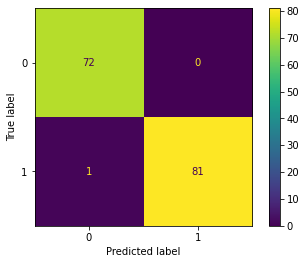

In [26]:
model = GradientBoostingClassifier()

param = {'n_estimators':[100,120,130,140,150,160],
       'learning_rate':[1.0,2,0.5,0.6,0.8,0.9]}

gridModel = GridSearchCV(model,param_grid=param,scoring='accuracy',cv=5,verbose=2)
trainModelGrid(gridModel,X_train_scaled,X_test_scaled,y_train,y_test)

In [27]:
model = GradientBoostingClassifier(n_estimators=130,learning_rate=1)
model.fit(X_train_scaled,y_train)
prob = model.predict_proba(X_test_scaled)[:,1]
y_pred = np.where(prob >=0.5,1,0) # Choosing custom thresold
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.99      0.99        82

    accuracy                           0.99       154
   macro avg       0.99      0.99      0.99       154
weighted avg       0.99      0.99      0.99       154

[[72  0]
 [ 1 81]]


# Final Model Validate test

In [28]:
# Random Forest 
# Decision Tree

In [41]:
# Here I will Not tune model This is final accuracy of the model

model = RandomForestClassifier(n_estimators=120)
model.fit(X_train_scaled,y_train)
prob = model.predict_proba(X_validate_scaled)[:,1]

y_pred = np.where(prob >=0.4,1,0) # Choosing custom thresold

print(classification_report(y_validate,y_pred))
print(confusion_matrix(y_validate,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        78

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154

[[76  0]
 [ 0 78]]


In [30]:
model = DecisionTreeClassifier()
model.fit(X_train_scaled,y_train)

y_pred = model.predict(X_validate_scaled)

print(classification_report(y_validate,y_pred))
print(confusion_matrix(y_validate,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        78

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154

[[76  0]
 [ 0 78]]


In [42]:
from joblib import dump
df = pd.read_csv('Converted_data_set')
X = df.drop('target',axis=1)
y = df['target']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

model = RandomForestClassifier()
model.fit(X_scaled,y)

RandomForestClassifier()

In [43]:
dump(scaler,'featureScaler.pkl')

['featureScaler.pkl']

In [44]:
dump(model,'HeartDiseasePredictor.pkl')

['HeartDiseasePredictor.pkl']